In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import reports
import utilities
import clean
import normalize
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = utilities.create_spelling_dictionary(wordlist_dir, wordlists)

In [7]:
title = "GS"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GS/baseline

Average verified rate: 0.9334002205428498

Average of error rates: 0.06745357142857143

Total token count: 1297707



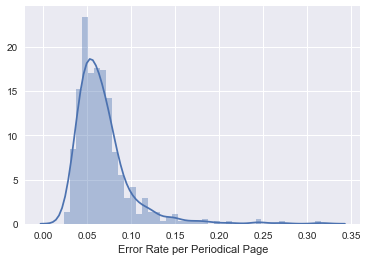

In [10]:
stats = reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = reports.get_errors_summary( stats )
reports.top_errors( errors_summary, 100 )

[('-', 2890),
 ("'", 2441),
 ('¥', 2014),
 ('ñ', 1493),
 (')', 1170),
 ('re-', 816),
 ('tion', 746),
 ('d', 692),
 ('con-', 690),
 ('t', 642),
 ('in-', 504),
 ('be-', 495),
 ('e', 489),
 ('w', 489),
 ('com-', 462),
 ('r', 425),
 ('(', 418),
 ('de-', 405),
 ('ment', 378),
 ('m', 360),
 ('f', 355),
 ('ñthe', 308),
 ('g', 303),
 ('ñno', 288),
 ('n', 279),
 ('ex-', 267),
 ('sab-', 252),
 ('th', 238),
 ("of'", 230),
 ('un-', 225),
 ("'the", 204),
 (']', 202),
 ("the'", 199),
 ('tions', 193),
 ('u', 189),
 ('im-', 186),
 ('dis-', 182),
 ('pro-', 178),
 ('ña', 171),
 ('en-', 171),
 ('ex', 170),
 ('per-', 167),
 ('pre-', 158),
 ('[vol', 156),
 ('ments', 154),
 ('x', 143),
 ('--', 141),
 ('chris-', 140),
 ('an-', 136),
 ('ob-', 135),
 ('command-', 132),
 ('ac-', 131),
 ('ble', 131),
 ('ap-', 129),
 ("'of", 127),
 ('ã', 126),
 ('/', 121),
 ('pp', 118),
 ('ad-', 111),
 ('aro', 110),
 ('semi-monthly', 109),
 ('_', 108),
 ('-the', 107),
 ('first-day', 107)]

## Check Special Character Use

In [12]:
reports.tokens_with_special_characters(errors_summary)[:500]

[('¥', 2014),
 ('ñ', 1493),
 (')', 1170),
 ('(', 418),
 ('ñthe', 308),
 ('ñno', 288),
 (']', 202),
 ('ña', 171),
 ('[vol', 156),
 ('ã', 126),
 ('/', 121),
 ('_', 108),
 ('*', 75),
 ('[the', 72),
 ('(rev', 71),
 ('(see', 67),
 ('ñjohn', 62),
 ('ñparties', 55),
 ('(matt', 51),
 ('ñit', 50),
 ('(the', 49),
 ('ñtent', 48),
 ('ñmeetings', 45),
 ('¥¥', 43),
 ('ñeld', 42),
 ('ñchurch', 42),
 ('ñselected', 40),
 ('`', 40),
 ('ñthat', 39),
 ('(verse', 38),
 ('ñj', 38),
 ('(isa', 34),
 ('(heb', 34),
 ('(gen', 33),
 ('ô', 32),
 ('(rom', 32),
 ('(john', 31),
 ('ñnot', 31),
 ('%', 31),
 ('ñand', 31),
 ('(acts', 30),
 ('(ps', 28),
 ('\\', 26),
 ('ñin', 26),
 ('ñi', 25),
 ('(as', 24),
 ('(a', 24),
 ('(for', 24),
 ('ñelds', 23),
 ('=', 23),
 ('ñbecause', 22),
 ('¥the', 22),
 ('(luke', 22),
 ("¥'", 22),
 ('ñtwo', 21),
 ('(and', 20),
 ('ñat', 20),
 ('ñfour', 20),
 ('ñs', 20),
 ('ñhistory', 19),
 ('(which', 19),
 ('ñyes', 19),
 ('[or', 19),
 ('•', 18),
 ('[von', 18),
 ('ñw', 18),
 ('ñd', 18),
 ('ñan', 18

## Correction 1 -- Normalize Characters

In [13]:
# %load shared_elements/normalize_characters.py
prev = "baseline"
cycle = "correction1"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"\’\’\‘\'\‛\´", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GS/correction1

Average verified rate: 0.9442336721500114

Average of error rates: 0.056576785714285704

Total token count: 1293128



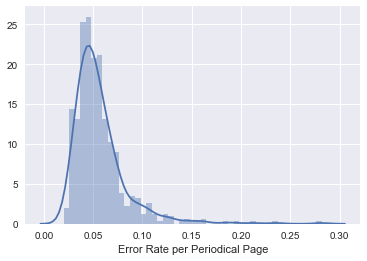

In [14]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [15]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('-', 3001),
 ("'", 2553),
 ('re-', 817),
 ('tion', 751),
 ('d', 721),
 ('con-', 691),
 ('t', 690),
 ('e', 516),
 ('w', 515),
 ('in-', 506),
 ('be-', 498),
 ('com-', 462),
 ('r', 455),
 ('de-', 407),
 ('ment', 379),
 ('f', 377),
 ('m', 372),
 ('g', 324),
 ('n', 304),
 ('ex-', 268),
 ('sab-', 253),
 ('th', 241),
 ("of'", 231),
 ('un-', 225),
 ("'the", 204),
 ("the'", 202),
 ('u', 196),
 ('tions', 193),
 ('ex', 187),
 ('im-', 186),
 ('dis-', 182),
 ('pro-', 179),
 ('en-', 171),
 ('per-', 171),
 ('pre-', 158),
 ('ments', 157),
 ('x', 154),
 ('--', 153),
 ('chris-', 144),
 ('ob-', 136),
 ('an-', 136),
 ('command-', 132),
 ('ble', 131),
 ('ac-', 131),
 ('ap-', 129),
 ("'of", 127),
 ('pp', 119),
 ('ad-', 112),
 ('aro', 110),
 ('semi-monthly', 109)]

## Correction 2 -- Reconnect Split Line Endings

In [16]:
# %load shared_elements/correct_line_endings.py
prev = "correction1"
cycle = "correction2"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GS/correction2

Average verified rate: 0.966747340132954

Average of error rates: 0.034048214285714286

Total token count: 1272620



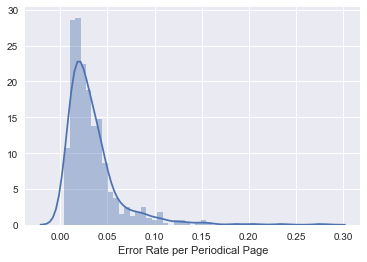

In [17]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('-', 2992),
 ("'", 2553),
 ('d', 721),
 ('t', 682),
 ('w', 515),
 ('e', 511),
 ('r', 452),
 ('f', 376),
 ('m', 372),
 ('g', 322),
 ('n', 304),
 ('th', 239),
 ("of'", 231),
 ("'the", 204),
 ("the'", 202),
 ('u', 195),
 ('ex', 187),
 ('x', 154),
 ('--', 153),
 ("'of", 127),
 ('pp', 119),
 ('aro', 110),
 ('semi-monthly', 109),
 ('first-day', 108),
 ('-the', 108),
 ("'and", 79),
 ('eze', 75),
 ("and'", 69),
 ("'to", 65),
 ('k', 64),
 ('re', 62),
 ('bo', 59),
 ("to'", 58),
 ('wo', 57),
 ("''", 57),
 ('-no', 56),
 ('tent-meetings', 52),
 ('q', 50),
 ('ti', 49),
 ('sunday-keeping', 48),
 ('tion', 48),
 ('ots', 48),
 ('mo', 45),
 ("in'", 45),
 ('ft', 43),
 ('---', 41),
 ('co', 39),
 ('wm', 39),
 ('rest-day', 38),
 ("'a", 38)]

## Correction 3 -- Remove extra dashes

In [19]:
# %load shared_elements/remove_extra_dashes.py
prev = "correction2"
cycle = "correction3"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
#         print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GS/correction3

Average verified rate: 0.9731340170454946

Average of error rates: 0.027557142857142856

Total token count: 1275293



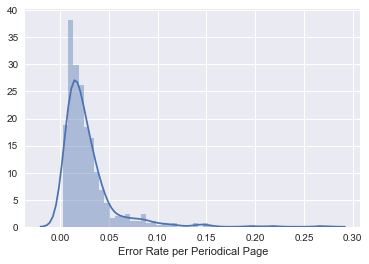

In [20]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [21]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 2637),
 ('d', 728),
 ('t', 698),
 ('e', 525),
 ('w', 519),
 ('r', 469),
 ('f', 384),
 ('m', 376),
 ('g', 331),
 ('n', 311),
 ('th', 244),
 ("of'", 231),
 ("'the", 206),
 ("the'", 202),
 ('u', 197),
 ('ex', 196),
 ('x', 160),
 ('re', 158),
 ("'of", 128),
 ('pp', 119),
 ('aro', 110),
 ('co', 91),
 ("'and", 79),
 ('eze', 75),
 ("and'", 71),
 ('ti', 67),
 ('k', 66),
 ("'to", 65),
 ('bo', 61),
 ("''", 59),
 ("to'", 58),
 ('wo', 57),
 ('q', 53),
 ('tion', 48),
 ('ots', 48),
 ("in'", 46),
 ('mo', 45),
 ('ft', 44),
 ('pre', 41),
 ('wm', 39),
 ("'in", 38),
 ("'a", 38),
 ("'is", 37),
 ('mt', 37),
 ("that'", 36),
 ("'that", 33),
 ('ment', 32),
 ("saints'", 31),
 ('es', 31),
 ("'t", 30)]

## Correction 4 -- Remove Extra Quotation Marks

In [22]:
# %load shared_elements/replace_extra_quotation_marks.py
prev = "correction3"
cycle = "correction4"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 1:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
#         print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GS/correction4

Average verified rate: 0.9758673740635434

Average of error rates: 0.024801785714285717

Total token count: 1275286



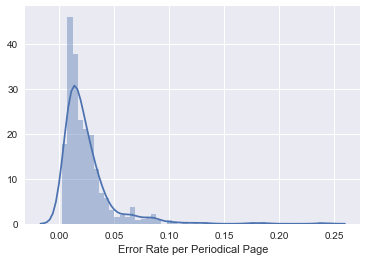

In [23]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [24]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 2240),
 ('t', 768),
 ('d', 734),
 ('e', 548),
 ('w', 522),
 ('r', 489),
 ('f', 403),
 ('m', 387),
 ('n', 337),
 ('g', 333),
 ('th', 247),
 ("of'", 218),
 ('u', 198),
 ('ex', 197),
 ("the'", 178),
 ('re', 166),
 ('x', 160),
 ('pp', 119),
 ('aro', 111),
 ('co', 92),
 ('eze', 75),
 ('ti', 68),
 ("and'", 66),
 ('k', 66),
 ('bo', 62),
 ('wo', 59),
 ('q', 53),
 ('tion', 50),
 ("to'", 49),
 ('ots', 48),
 ('mo', 46),
 ('ft', 44),
 ('pre', 42),
 ("''", 41),
 ("in'", 40),
 ('wm', 40),
 ('mt', 37),
 ('nd', 36),
 ('al', 32),
 ('se', 32),
 ('ment', 32),
 ('es', 31),
 ('mal', 30),
 ('pa', 30),
 ("saints'", 30),
 ("that'", 29),
 ('goapxl', 27),
 ('ay', 27),
 ('iu', 27),
 ('il', 26)]

## Check Correction 5 -- Rejoin Burst Words

In [25]:
# %load shared_elements/rejoin_burst_words.py
prev = "correction4"
cycle = "correction5"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    pattern = re.compile("(\s(\w{1,2}\s){5,})")
    
    replacements = []
    clean.check_splits(pattern, spelling_dictionary, content, replacements)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

GS18860201-V01-01-page1.txt: [('By', 'By')]
GS18860415-V01-06-page2.txt: [(' h o r n s ', 'horns')]
GS18860815-V01-14-page7.txt: [('\nF R A N C E ', 'FRANCE')]
GS18861015-V01-18-page6.txt: [('It', 'It')]
GS18861101-V01-19-page4.txt: [('Is', 'Is')]
GS18861208-V01-22-page8.txt: [(' b el o v ed ', 'beloved')]
GS18861222-V01-24-page8.txt: [('Go', 'Go')]
GS18870315-V02-06-page3.txt: [('If', 'If')]
GS18880101-V03-01-page7.txt: [('It', 'It')]
GS18880215-V03-04-page3.txt: [('We', 'We')]
GS18881001-V03-19-page2.txt: [('It', 'It'), ('If', 'If')]
GS18881101-V03-21-page1.txt: [('\nE D IT O R IA L ', 'EDITORIAL'), (' C O M M IT T E E ', 'COMMITTEE')]
GS18881215-V03-24-page5.txt: [(' d u r i n g ', 'during')]
GS18881215-V03-24-page6.txt: [('It', 'It')]


Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GS/correction5

Average verified rate: 0.9758713136729222

Average of error rates: 0.024798214285714288

Total token count: 1275287



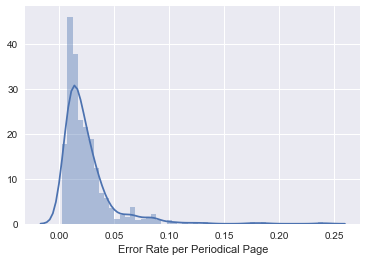

In [26]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [27]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 2240),
 ('t', 767),
 ('d', 745),
 ('e', 544),
 ('w', 522),
 ('r', 485),
 ('f', 402),
 ('m', 385),
 ('n', 334),
 ('g', 332),
 ('th', 247),
 ("of'", 218),
 ('ex', 197),
 ('u', 197),
 ("the'", 178),
 ('re', 166),
 ('x', 160),
 ('pp', 119),
 ('aro', 111),
 ('co', 92),
 ('eze', 75),
 ('ti', 68),
 ("and'", 66),
 ('k', 66),
 ('bo', 62),
 ('wo', 59),
 ('q', 53),
 ('tion', 50),
 ("to'", 49),
 ('ots', 48),
 ('mo', 46),
 ('ft', 44),
 ('pre', 42),
 ("''", 41),
 ("in'", 40),
 ('wm', 40),
 ('mt', 37),
 ('nd', 36),
 ('al', 32),
 ('se', 32),
 ('ment', 32),
 ('es', 31),
 ('mal', 30),
 ('pa', 30),
 ("saints'", 30),
 ("that'", 29),
 ('goapxl', 27),
 ('ay', 27),
 ('iu', 27),
 ('il', 26)]

## Correction 6 -- Rejoin Split Words

In [28]:
# %load shared_elements/rejoin_split_words.py
prev = "correction5"
cycle = "correction6"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    errors = reports.identify_errors(tokens, spelling_dictionary)

    replacements = clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

GS18860201-V01-01-page2.txt: [('es', 'pecially')]
GS18860201-V01-01-page8.txt: [('co', 'operation'), ('re', 'examined')]
GS18860215-V01-02-page1.txt: [('Bi', 'ble'), ('mo', 'e')]
GS18860215-V01-02-page3.txt: [('M.', '')]
GS18860215-V01-02-page4.txt: [('re', 'examination')]
GS18860215-V01-02-page6.txt: [('co', 'operate'), ('wi', 'th'), ('gos', 'pel')]
GS18860215-V01-02-page7.txt: [('Mor', 'ton')]
GS18860215-V01-02-page8.txt: [('bi', 'monthly'), ('co', 'worker'), ('re', 'echoed')]
GS18860301-V01-03-page1.txt: [('hu', 'manity'), ('Conti', 'nent')]
GS18860301-V01-03-page3.txt: [('sugges', 'tion'), ('experi', 'ment')]
GS18860301-V01-03-page5.txt: [('wor', 'shiped'), ('mUr', 'der')]
GS18860301-V01-03-page6.txt: [('wa', 's')]
GS18860301-V01-03-page7.txt: [('TH', 'E')]
GS18860301-V01-03-page8.txt: [('Nebu', "chadnezzar's")]
GS18860315-V01-04-page1.txt: [('Re', 'in')]
GS18860315-V01-04-page2.txt: [('ne', 'man'), ('th', 'e')]
GS18860315-V01-04-page4.txt: [('dei', 'L'), ('ac', 'count'), ('se', 'a

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GS/correction6

Average verified rate: 0.9761960041163625

Average of error rates: 0.024453571428571425

Total token count: 1274912



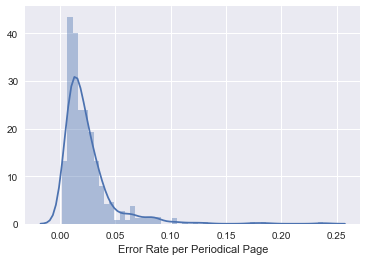

In [29]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [30]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 2240),
 ('t', 757),
 ('d', 744),
 ('e', 531),
 ('w', 522),
 ('r', 483),
 ('f', 402),
 ('m', 383),
 ('g', 331),
 ('n', 328),
 ('th', 241),
 ("of'", 218),
 ('u', 197),
 ('ex', 193),
 ("the'", 178),
 ('x', 159),
 ('pp', 119),
 ('aro', 110),
 ('re', 105),
 ('eze', 75),
 ("and'", 66),
 ('k', 66),
 ('ti', 61),
 ('wo', 59),
 ('bo', 57),
 ('q', 53),
 ("to'", 49),
 ('ots', 48),
 ('tion', 44),
 ('ft', 44),
 ('mo', 41),
 ("''", 41),
 ('co', 40),
 ("in'", 40),
 ('wm', 40),
 ('mt', 37),
 ('nd', 36),
 ('ment', 32),
 ("saints'", 30),
 ('mal', 29),
 ("that'", 29),
 ('pa', 29),
 ('al', 29),
 ('goapxl', 27),
 ('ay', 27),
 ('iu', 27),
 ('se', 27),
 ('il', 26),
 ('es', 25),
 ('gospxi', 24)]

## Review Remaining Errors

In [31]:
# %load shared_elements/high_error_rates.py
reports.docs_with_high_error_rate(summary)

doc_keys = [x[0] for x in reports.docs_with_high_error_rate(summary) if x[1] > 0.2]

# utilities.open_original_docs(doc_keys, directories['cycle'])

Opened files: 

GS18870801-V02-15-page8.txt



In [32]:
reports.long_errors(errors_summary, min_length=15)[:50]

(["steamship'nevada",
  'governtheritlialunderstood',
  'hferoimnyasbaill',
  'germanstatiatichni',
  'tehcommandthents',
  'tioanldutahteuirecaseisfarvererycogrodoed',
  'wasthefirstwritten',
  'bethoughtthemselveswhatagrandthingitwouldbe',
  'biblesaysdistinctly',
  'bblelesssininggss',
  'llllllllllllllllllllllllllllllll',
  'consciencestricken',
  'snpererdgationompe',
  'suintnattetarguments',
  'unitedtestimonies',
  'whisicyclisiilling',
  'thatwasanageofrites',
  'thetransgresaion',
  'inisgsrighteousness',
  'ttjdtzeotgrttrtttein',
  'uponlookingoverthe',
  'irelesedcogrdinccosiwihichofaaerisi',
  'buttheapostlepaul',
  "this'ilay'on'which",
  "lidfilled'except",
  'cerietitutimielity',
  'theliiiiiittyilontlif',
  'filltifineettpled',
  "michigan'conference",
  'cirotgati-tmlitioliptition',
  'thwartedprianttice',
  'repeatedwarnings',
  "twile'lesetiitdr",
  're-establishment',
  '-absoluteprohibition',
  "neviteri''ociiiiit",
  "ionalmissionary's",
  'thelordwishedtoassureh

## Correction 7 -- Split Squashed Errors

In [33]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = cycle
cycle = "correction7"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = utilities.readfile(directories['prev'], filename)
    clean.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
maxword = max(len(x) for x in sorted_list_of_words)

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    text = utilities.strip_punct(content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 17:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = clean.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if clean.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

GS18860301-V01-03-page1.txt: [('forciblyillustrated', 'forcibly illustrated'), ('terriblethreatenings', 'terrible threatenings')]
GS18860401-V01-05-page1.txt: [('theexaminationofthings', 'the examination of things')]
GS18860501-V01-07-page2.txt: [('containedprovisions', 'contained provisions')]
GS18860501-V01-07-page7.txt: [('iiiiiiiiiiiiiiiiiiiiiiiii', 'iii iii iii iii iii iii iii iii i')]
GS18860501-V01-07-page8.txt: [('Thisisonlyinfulfillmentofthecharacteristicsgiven', 'This is only in fulfillment of the characteristics given'), ('TheLordwishedtoassurehishearersthe', 'The Lord wished to assure his hearers the')]
GS18860601-V01-09-page1.txt: [('Biblesaysdistinctly', 'Bible says distinctly'), ('thebranchesofthefig', 'the branches of the fig')]
GS18860701-V01-11-page1.txt: [('EDITORIALCOMMITTEE', 'EDITORIAL COMMITTEE')]
GS18860901-V01-15-page5.txt: [('poraljudgmentswerethusbroughtuponthem', 'p oral judgments were thus brought upon them')]
GS18860915-V01-16-page4.txt: [('utterlyastonish

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/GS/correction7

Average verified rate: 0.9762387961387358

Average of error rates: 0.024405357142857142

Total token count: 1275230



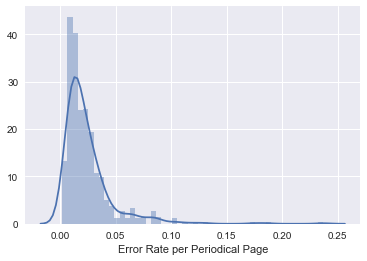

In [34]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [35]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 2240),
 ('t', 758),
 ('d', 745),
 ('e', 535),
 ('w', 522),
 ('r', 483),
 ('f', 403),
 ('m', 385),
 ('g', 332),
 ('n', 328),
 ('th', 241),
 ("of'", 218),
 ('u', 200),
 ('ex', 193),
 ("the'", 178),
 ('x', 159),
 ('pp', 119),
 ('aro', 110),
 ('re', 105),
 ('eze', 75),
 ("and'", 66),
 ('k', 66),
 ('ti', 61),
 ('wo', 59),
 ('bo', 57),
 ('q', 53),
 ("to'", 49),
 ('ots', 48),
 ('tion', 44),
 ('ft', 44),
 ('mo', 41),
 ("''", 41),
 ('co', 40),
 ("in'", 40),
 ('wm', 40),
 ('mt', 37),
 ('nd', 36),
 ('ment', 32),
 ("saints'", 30),
 ('mal', 29),
 ("that'", 29),
 ('pa', 29),
 ('al', 29),
 ('goapxl', 27),
 ('ay', 27),
 ('iu', 27),
 ('se', 27),
 ('il', 26),
 ('es', 25),
 ('gospxi', 24)]